In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [3]:
import networkx as nx
import nxviz as nv
from nxviz import annotate
from nxviz import nodes
from nxviz import edges
from nxviz.plots import aspect_equal, despine

from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap, Normalize
import igraph as ig

from pyvis.network import Network

/Users/luuzemp14/opt/anaconda3/envs/gbsv_deepdive1/lib/python3.11/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [4]:
with open('data/starwars-episode-1-interactions.json') as f:
    data_interactions = json.load(f)
print(data_interactions['nodes'][0])
print(data_interactions['links'][0])

{'name': 'QUI-GON', 'value': 60, 'colour': '#4f4fb1'}
{'source': 1, 'target': 0, 'value': 1}


In [5]:
with open('data/starwars-episode-1-interactions.json') as f:
    data_mentions = json.load(f)
print(data_mentions['nodes'][0])
print(data_mentions['links'][0])

{'name': 'QUI-GON', 'value': 60, 'colour': '#4f4fb1'}
{'source': 1, 'target': 0, 'value': 1}


In [6]:
with open('data/starwars-episode-1-interactions-allCharacters.json') as f:
    data_all = json.load(f)
print(data_all['nodes'][0])
print(data_all['links'][0])

{'name': 'R2-D2', 'value': 33, 'colour': '#bde0f6'}
{'source': 15, 'target': 0, 'value': 11}


In [7]:
def create_graph(data):
    G = nx.Graph()

    #build graph nodes
    for node in data['nodes']:
        G.add_node(node['name'])
        G.nodes[node['name']]['colour'] = node['colour']
        G.nodes[node['name']]['scenes'] = node['value']
        G.nodes[node['name']]['name'] = node['name']
    
    #build graph edges
    for edge in data['links']:
        G.add_edge(data['nodes'][edge['source']]['name'], data['nodes'][edge['target']]['name'], weight=edge['value'])
    
    return G

In [8]:
G_interactions = create_graph(data_interactions)
G_mentions = create_graph(data_mentions)
G_all = create_graph(data_all)
G = [G_interactions, G_mentions, G_all]

In [9]:
print('Data from the Interactions Network')
print('Number of nodes: ', G[0].number_of_nodes())
print('Number of links:', G[0].number_of_edges())

Data from the Interactions Network
Number of nodes:  37
Number of links: 129


In [10]:
print('Data from the Mentions Network')
print('Number of nodes: ', G[1].number_of_nodes())
print('Number of links:', G[1].number_of_edges())

Data from the Mentions Network
Number of nodes:  37
Number of links: 129


In [11]:
print('Data from the Merge Network')
print('Number of nodes: ', G[2].number_of_nodes())
print('Number of links:', G[2].number_of_edges())

Data from the Merge Network
Number of nodes:  38
Number of links: 135


In [12]:
set(G[1].nodes()) - set(G[0].nodes())

set()

In [13]:
# Draw a graph using NetworkX
def draw_one_graph(G, title, size=20):
    fig, ax = plt.subplots(figsize=(size, size))
    pos = nx.spring_layout(G, seed=42)  # positions for all nodes

    # nodes
    options = {"edgecolors": "tab:gray", "node_size": 800, "alpha": 0.5}
    nx.draw_networkx_nodes(G, pos, node_color="tab:green", **options)

    # edges
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

    #labels
    nx.draw_networkx_labels(G,pos, font_size=16)

    plt.tight_layout()
    plt.title(title, fontsize=20)
    plt.axis("off")
    plt.show()
    

# Draws a graph with a circle structure using the nxviz library
def draw_circle_graph(G, title, size=20):
    fig, ax = plt.subplots(figsize=(size, size))
    pos = nodes.circos(G, group_by="name", color_by="colour")
    edges.circos(G, pos)
    annotate.circos_group(G, group_by="name")
    despine()
    aspect_equal()
    
# Draws a graph arranging nodes in a line and edges as arcs (using the nxviz library)
def draw_arc_graph(G, title, size=20):
    fig, ax = plt.subplots(figsize=(size, size))
    pos = nodes.arc(G, group_by="name", color_by="colour")
    edges.arc(G, pos)
    annotate.arc_group(G, group_by="name")
    despine()
    aspect_equal()
    
# Draw a graph using the igraph library (this visualization use all the node and edges features)
def draw_graph_with_features(net, size=15):
    # Rescale weight to be between 0.0 and 1.0
    scaled_weight = ig.rescale(net.es["weight"], clamp=True)
    cmap2 = LinearSegmentedColormap.from_list("edge_cmap", ["lightblue", "midnightblue"])

    fig, ax = plt.subplots(figsize=(size,size))
    ig.plot(
        net,
        target=ax,
        layout="circle", # print nodes in a circular layout
        vertex_size= [num/(max(net.vs["scenes"])*5) if num > 20 else 0.05 for num in net.vs["scenes"]], #0.1,
        vertex_color=[color for color in net.vs["colour"]],
        vertex_frame_width=4.0,
        vertex_frame_color="white",
        vertex_label=net.vs["name"],
        edge_width=net.es["weight"],
        edge_color= [cmap2(value) for value in scaled_weight]#"#7142cf"
    )

    plt.show()

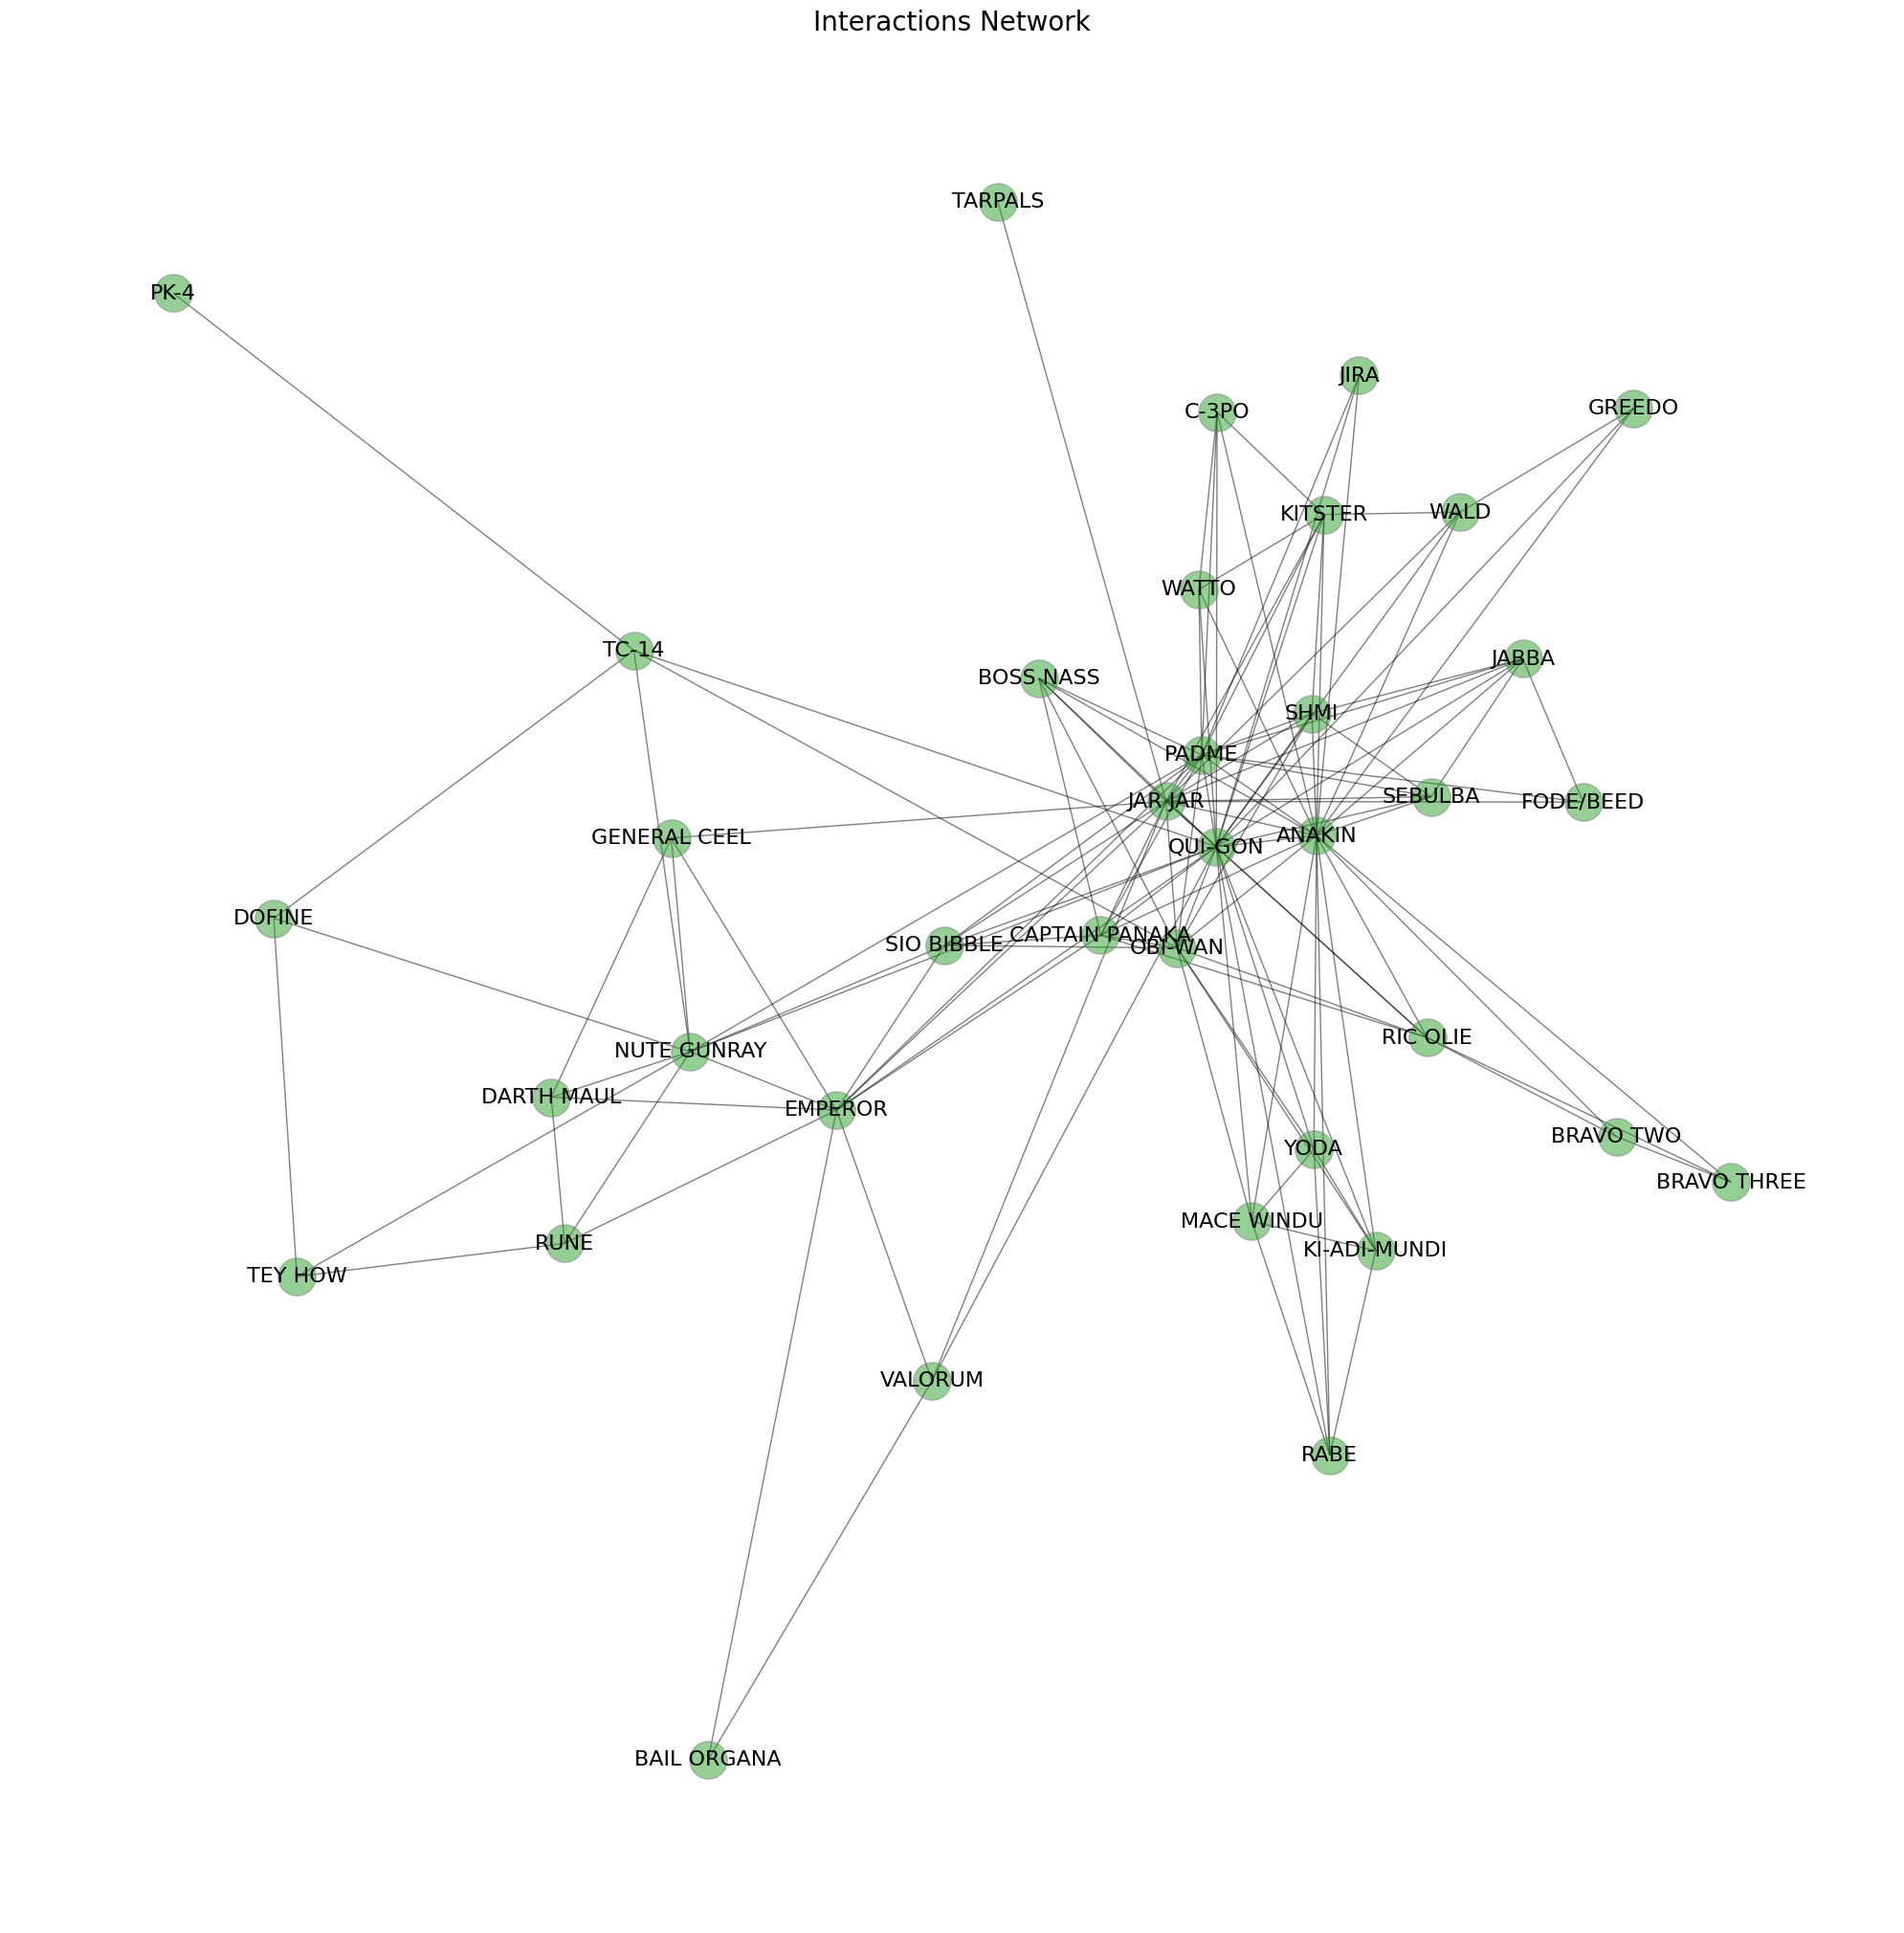

In [ ]:
draw_one_graph(G[0], 'Interactions Network')